## Introduction:

In this analysis, we’ll take a closer look at a dataset of movies released over the years, exploring various factors that contribute to a movie's success. We'll be examining things like ratings, budgets, gross earnings, and more, to see how these elements impact the overall performance of a movie.

Our main goal is to uncover insights that answer questions such as:

Which production companies tend to make the most money?
How closely are a movie's budget and earnings related?
What drives a movie's success, both financially and critically?
We’ll start by getting familiar with the data through an Exploratory Data Analysis (EDA), cleaning up any missing values. Then, we’ll visualize the key metrics to get a better sense of how the data is distributed and how various factors relate to one another.

then, we’ll dive into correlation analysis to figure out which factors—like budget, score, or genre that have the biggest impact on things like earnings or audience ratings. We'll even look at categorical fields like movie genres and production companies to see if they play a role in movie success.

## Import Libraries:

In [585]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import textwrap
import warnings
# Hide all warnings
warnings.filterwarnings("ignore")

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8) 

## Load the data:

In [586]:
# Import the data
df = pd.read_csv('movies.csv')
# show the first 5 rows in the data
df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


## Overview of the data:

In [587]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [588]:
#data type
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

**Check the NA values and Outliers:**

1- NA values

In [589]:
# Check the missing data
missing_data = df.isnull()  

# count the missing number of each value in each column
missing_count = missing_data.sum()

#check the missing number of each value in each column
print(missing_count)

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64


In [590]:
#check each missing value percantage
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False)


budget      28.312467
gross        2.464789
rating       1.004173
company      0.221701
runtime      0.052165
score        0.039124
votes        0.039124
writer       0.039124
country      0.039124
released     0.026082
star         0.013041
name         0.000000
genre        0.000000
year         0.000000
director     0.000000
dtype: float64

## we can observe huge missing values in both fields budget 28% & gross 2.5%

## So we need to handle those missing values first

**Data Cleansing**

2- Check Outliers using a boxplot for budget and gross values using boxplots:

<Axes: >

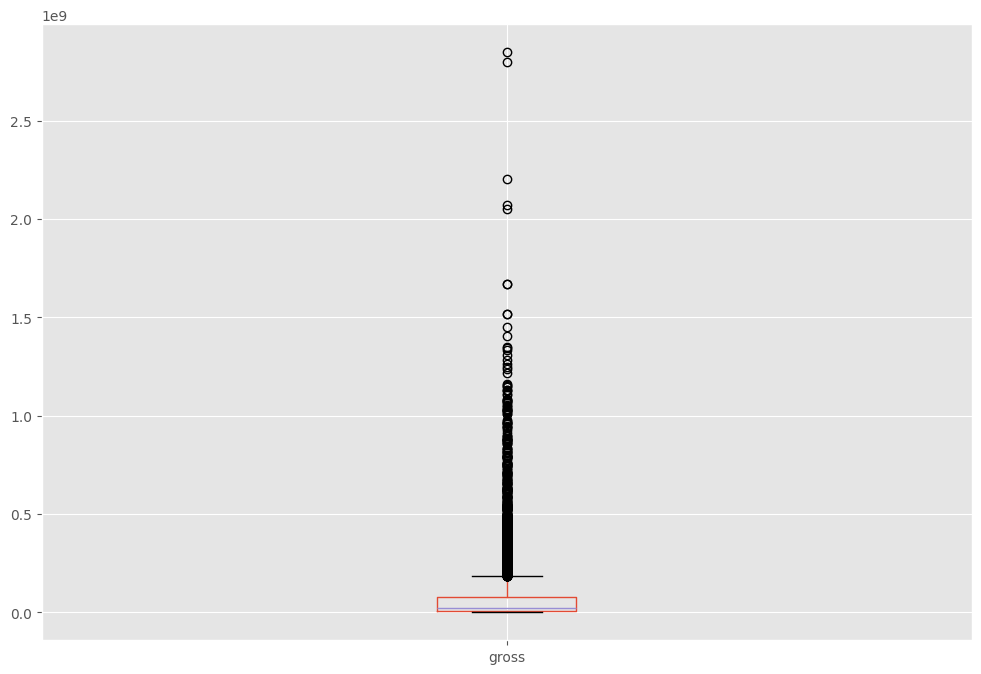

In [591]:
# Check Outliers using a boxplot for gross values using boxplots
df_cleaned.boxplot(column=['gross'])

<Axes: >

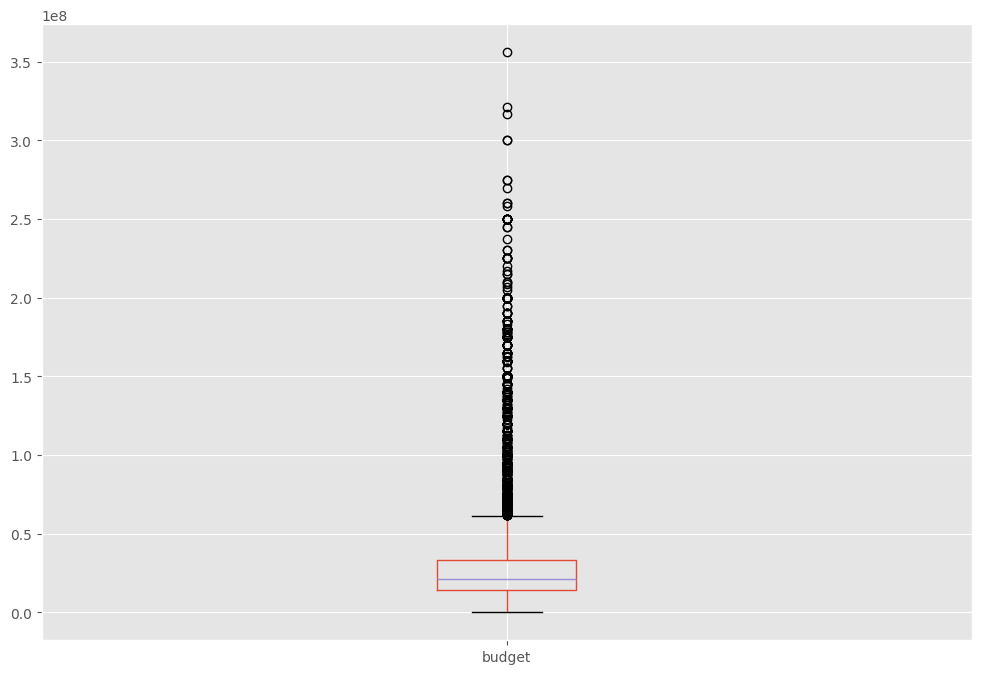

In [592]:
# Check Outliers using a boxplot for budget values using boxplots
df_cleaned.boxplot(column=['budget'])

**We also observe Outliers in both Budget & gross values**

**SO, as we can figured out outliers in budget values; we will do the following: 
1- dealing with "Budget" field NA values by filling the Na values with the median to avoid the effect of the outliers in gross mean value
2- drop the "gross" NA values since its only present 2.5%
3- Filling categorical columns with mode (most frequent value)**

In [593]:
# Data Cleaning

# Dropping rows with missing 'gross' since its only present 2.5%
df_cleaned = df.dropna(subset=['gross'])

# For other missing values, we can fill:
# Filling numeric columns with median values
df_cleaned['budget'].fillna(df_cleaned['budget'].median(), inplace=True)
df_cleaned['score'].fillna(df_cleaned['score'].median(), inplace=True)
df_cleaned['votes'].fillna(df_cleaned['votes'].median(), inplace=True)
df_cleaned['runtime'].fillna(df_cleaned['runtime'].median(), inplace=True)

# Filling categorical columns with mode (most frequent value)
df_cleaned['rating'].fillna(df_cleaned['rating'].mode()[0], inplace=True)
df_cleaned['released'].fillna(df_cleaned['released'].mode()[0], inplace=True)
df_cleaned['writer'].fillna(df_cleaned['writer'].mode()[0], inplace=True)
df_cleaned['star'].fillna(df_cleaned['star'].mode()[0], inplace=True)
df_cleaned['country'].fillna(df_cleaned['country'].mode()[0], inplace=True)
df_cleaned['company'].fillna(df_cleaned['company'].mode()[0], inplace=True)

# Confirming that the missing values have been addressed
missing_values_after_cleaning = df_cleaned.isnull().sum()

missing_values_after_cleaning

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [594]:
# show data description
df_cleaned.describe()

,year,score,votes,budget,gross,runtime
count,7479.000000,7479.000000,7.479000e+03,7.479000e+03,7.479000e+03,7479.000000
mean,2000.657708,6.398757,9.014732e+04,3.185793e+07,7.850054e+07,107.442439
std,11.054811,0.962966,1.648068e+05,3.604056e+07,1.657251e+08,18.512087
min,1980.000000,1.900000,3.400000e+01,6.000000e+03,3.090000e+02,63.000000
25%,1991.000000,5.800000,9.900000e+03,1.400000e+07,4.532056e+06,95.000000
50%,2001.000000,6.500000,3.400000e+04,2.100000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.600000e+04,3.300000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [595]:
# check the data field types
df_cleaned.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [596]:
# check for any missing value
for col in df_cleaned.columns:
    pct_missing = np.mean(df_cleaned[col].isnull())
    print('{} - {}%'.format(col, pct_missing))


name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


change data type for some fields in the data to be more easy in analysis

In [597]:
# change data type for some fields in the data 
df_cleaned['budget'] = df_cleaned['budget'].astype('int64')
df_cleaned['gross'] = df_cleaned['gross'].astype('int64')
df_cleaned['runtime'] = df_cleaned['runtime'].astype('int64')
df_cleaned['votes'] = df_cleaned['votes'].astype('int64')

# check after amend
df_cleaned.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime       int64
dtype: object

In [598]:
#check the change done
df_cleaned.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


Create new field for released year:

In [599]:
#check if the year column need to be amended vs released column
df_cleaned['released'] = df_cleaned['released'].astype(str)

# Print the first few entries to verify the content
print(df_cleaned['released'].head())

# Extract the year using a regular expression
df_cleaned['released_year'] = df_cleaned['released'].str.extract(r'(\d{4})')

#chech after amend
df_cleaned.head()

0    June 13, 1980 (United States)
1     July 2, 1980 (United States)
2    June 20, 1980 (United States)
3     July 2, 1980 (United States)
4    July 25, 1980 (United States)
Name: released, dtype: object


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980


In [600]:
# check the new released year field 
df_cleaned['released_year']

0       1980
1       1980
2       1980
3       1980
4       1980
        ... 
7653    2020
7655    2020
7656    2020
7657    2020
7659    2020
Name: released_year, Length: 7479, dtype: object

In [601]:
#sorting the data by gross values descending
df_cleaned = df_cleaned.sort_values(by=['gross'], inplace=False, ascending=False)

In [602]:
#drop duplication
df_cleaned=df_cleaned.drop_duplicates()

# Deep analysis for the data

**1- No. of movies per year**

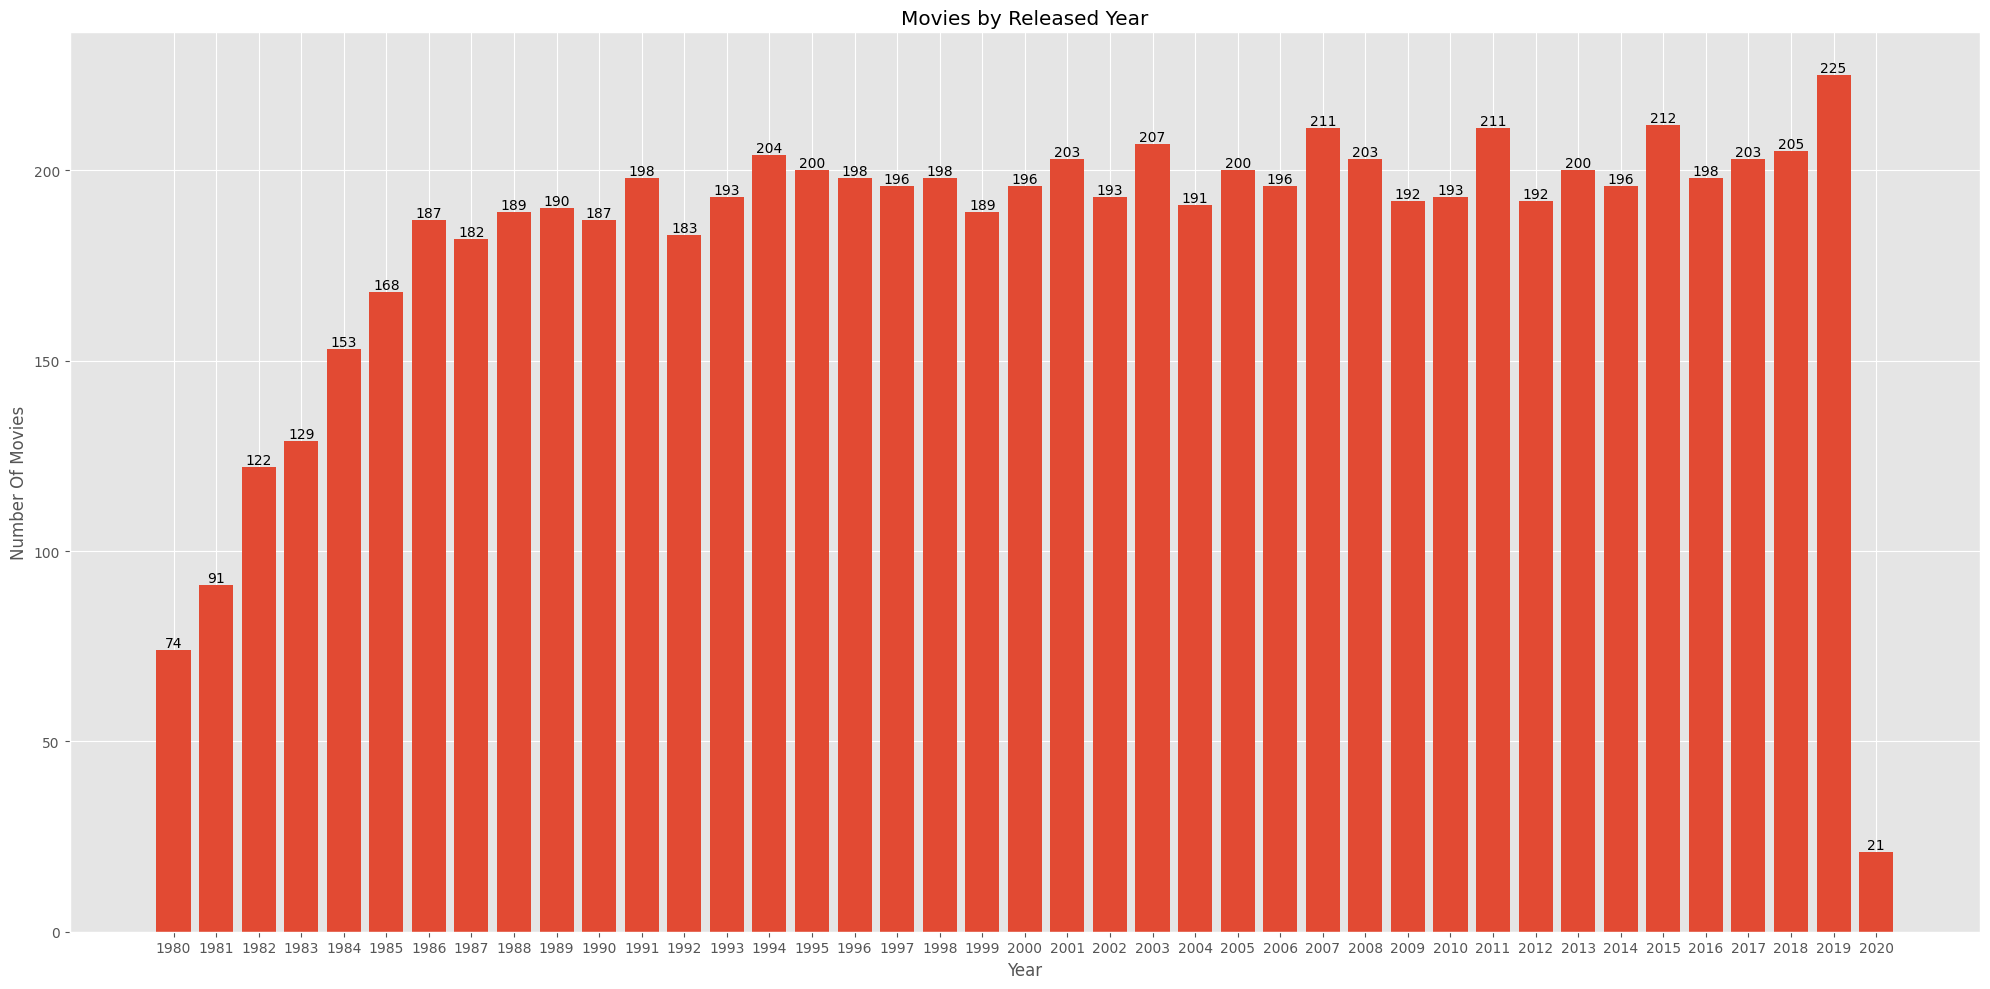

In [603]:
#create analysis with released year
year = df_cleaned["released_year"].value_counts().sort_index()
year.head()

# Data
x = year.index
y = year.values

# Create figure and set size
plt.figure(figsize=(20, 10))  # Adjust width and height as needed

# Create the bar plot
bars = plt.bar(x, y)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Number Of Movies')
plt.title('Movies by Released Year')

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), 
             ha='center', va='bottom')  # ha and va control horizontal and vertical alignment

# Adjust layout to fit everything neatly
plt.tight_layout()

# Show the plot
plt.show()

**2- No. of movies per Country**

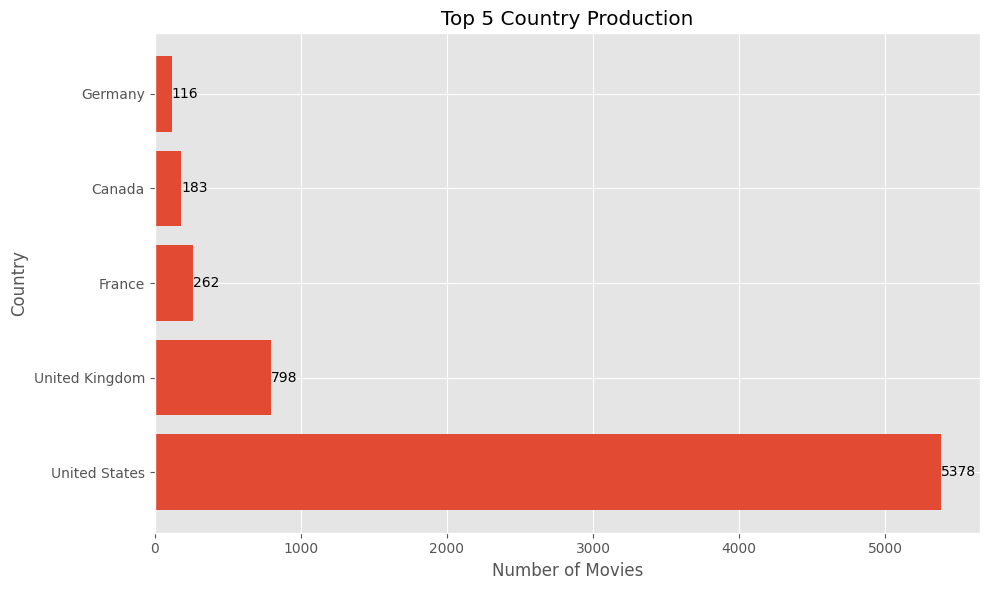

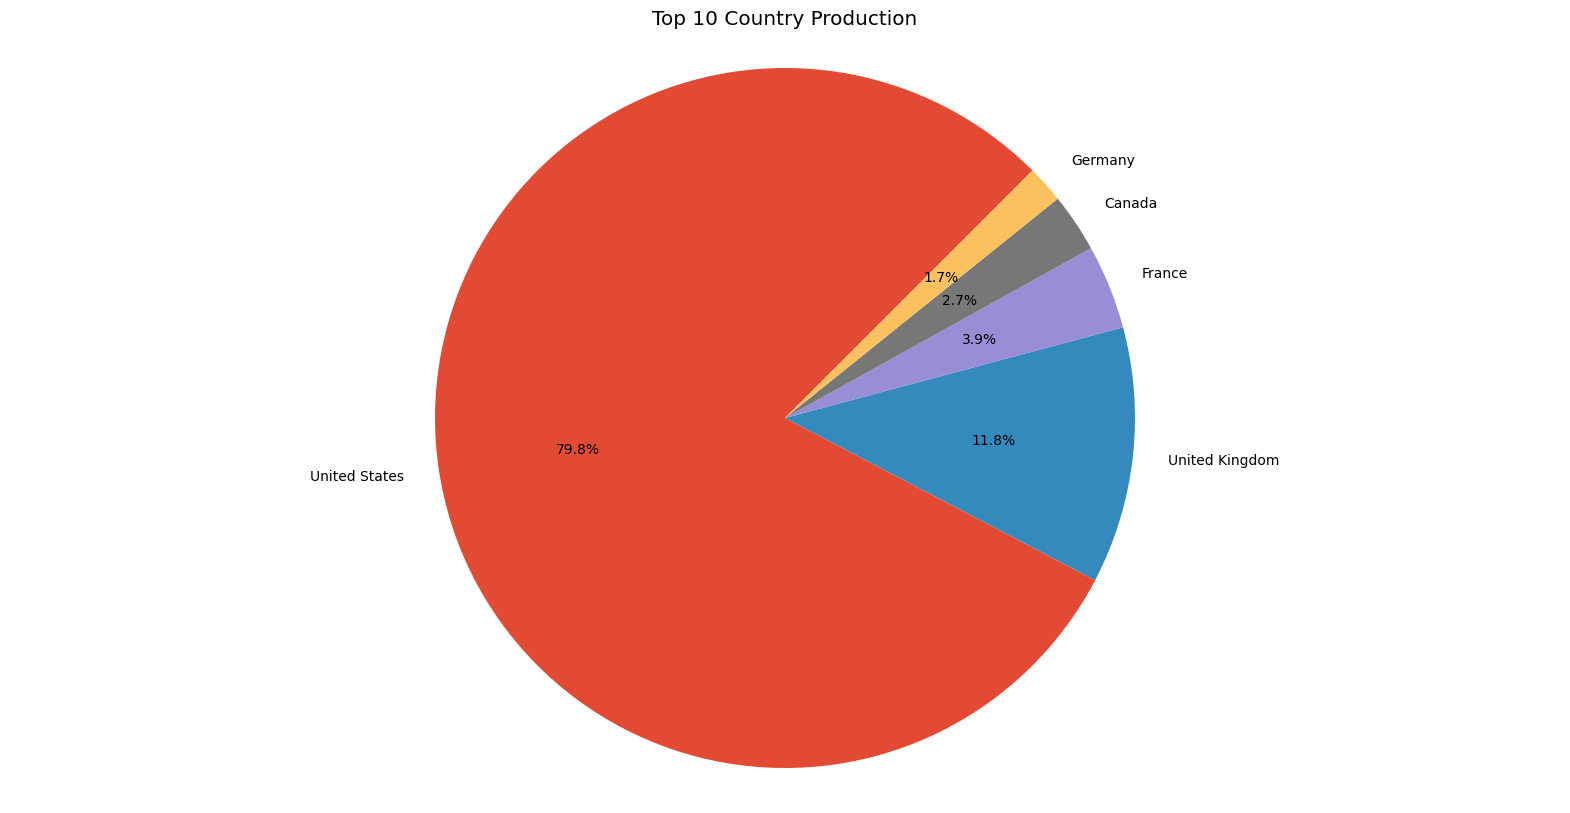

In [604]:
#create analysis per Country
country = df_cleaned["country"].value_counts().sort_values(ascending=False).head(5)
country.head()

# Data
y = country.index
x = country.values

# Create figure and set size
plt.figure(figsize=(10, 6))

# Create the horizontal bar plot
bars = plt.barh(y, x)

# Add labels and title
plt.xlabel('Number of Movies')
plt.ylabel('Country')
plt.title('Top 5 Country Production')

# Add value labels on each bar
plt.bar_label(bars)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

# pie chart
# Data
labels = country.index
sizes = country.values

# Create figure and set size
plt.figure(figsize=(20, 10))

# Create the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=45, textprops={'fontsize': 10})

# Add title
plt.title("Top 10 Country Production")

# Ensure the pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()

**3- No. of movies per Star**

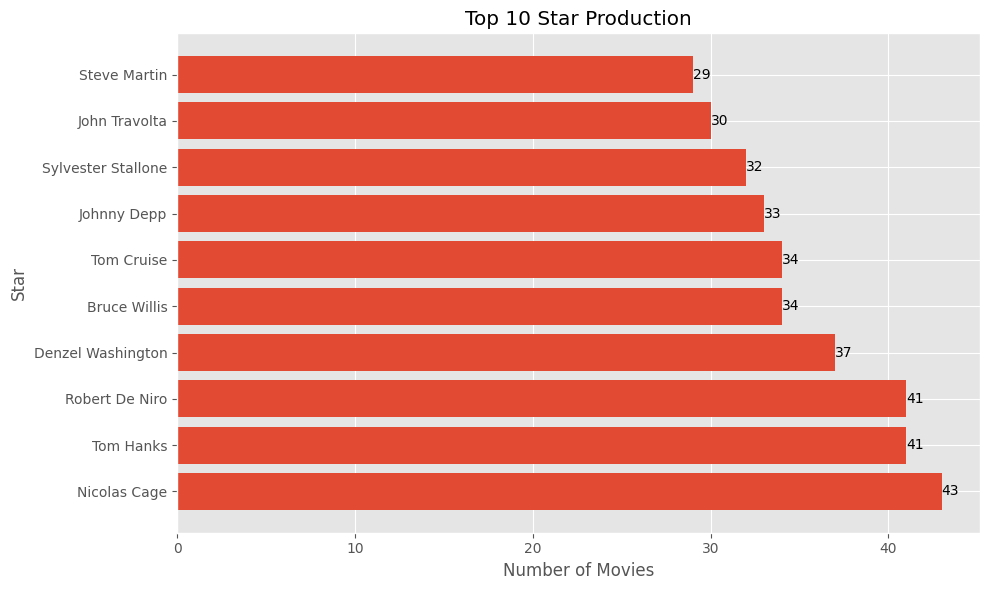

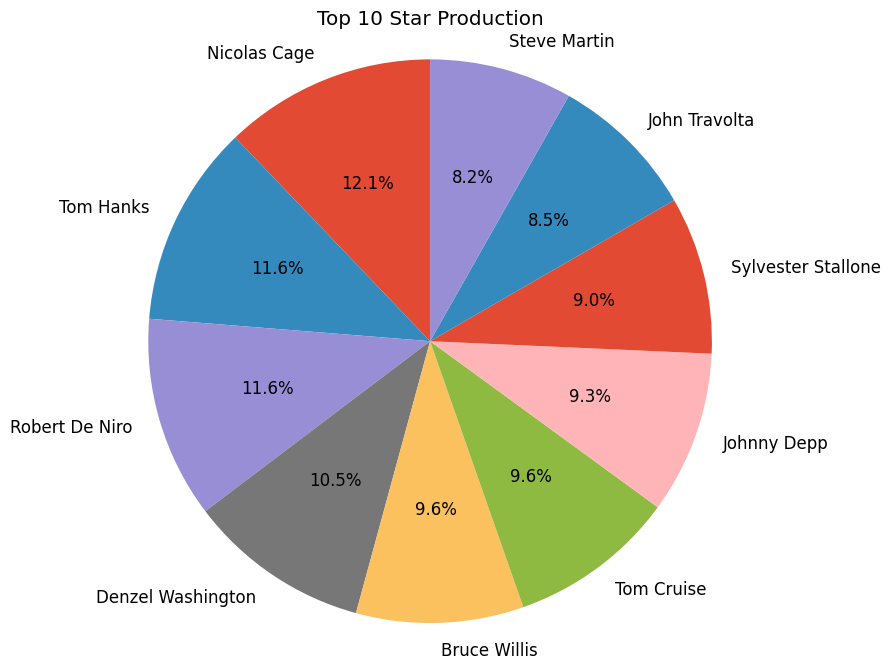

In [605]:
#create analysis for star
star = df_cleaned["star"].value_counts().sort_values(ascending=False).head(10)
star.head()

# Data
y = star.index
x = star.values

# Create figure and set size
plt.figure(figsize=(10, 6))

# Create the horizontal bar plot
bars = plt.barh(y, x)

# Add labels and title
plt.xlabel('Number of Movies')
plt.ylabel('Star')
plt.title('Top 10 Star Production')

# Add value labels on each bar
plt.bar_label(bars)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

#pie chart

# Data
labels = star.index
sizes = star.values

# Create figure and set size
plt.figure(figsize=(8, 8))

# Create the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 12})

# Add title
plt.title("Top 10 Star Production")

# Ensure the pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()

**4- Top 10 movies by score**

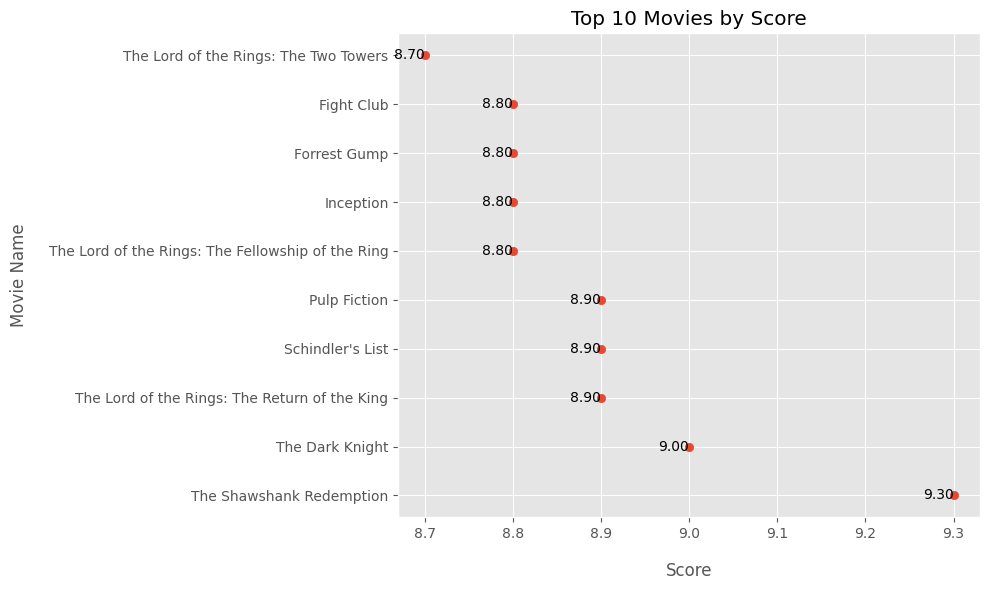

In [606]:
#create analysis for score
movie_score = df_cleaned["score"].nlargest(10)
top_movies = df_cleaned.loc[movie_score.index, ["name", "score"]].reset_index(drop=True)
top_movies


# Data
y = top_movies["name"]
x = top_movies["score"]

# Create figure and set size
plt.figure(figsize=(10, 6))

# Create the scatter plot
plt.scatter(x, y)

# Add labels and title with adjusted padding
plt.xlabel('Score', labelpad=15)  # Adjust the x-axis label position
plt.ylabel('Movie Name', labelpad=15)  # Adjust the y-axis label position
plt.title('Top 10 Movies by Score')

# Add labels to each point
for i in range(len(x)):
    plt.text(x[i], y[i], f'{x[i]:.2f}', va='center', ha='right', fontsize=10)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

**5- Top 15 Company by earnings**

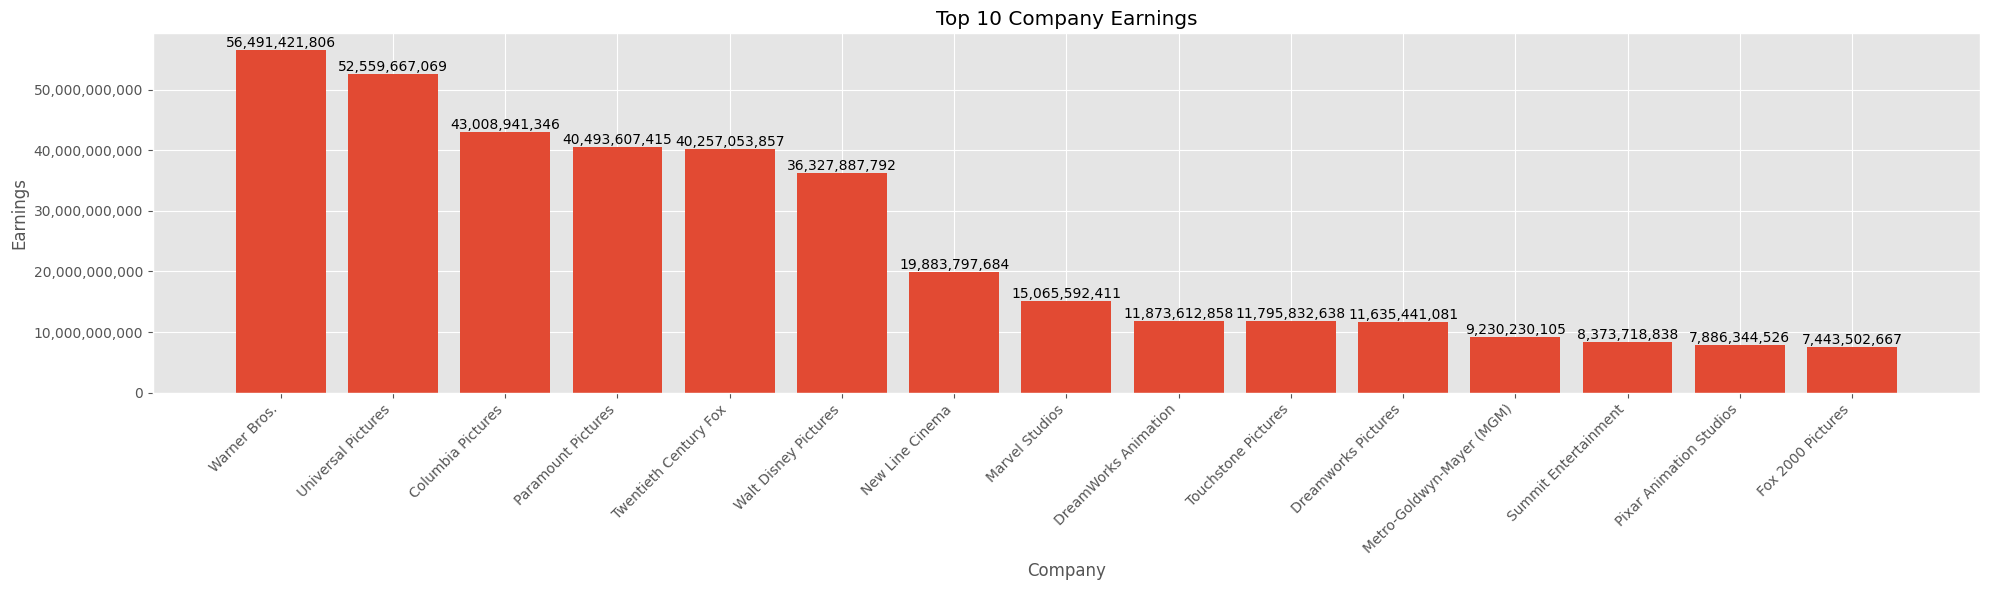

In [607]:
# group by company with total gross
CompanyGross = df_cleaned.groupby(['company'])[["gross"]].sum()

CompanyGrossSorted = CompanyGross.sort_values(['gross','company'], ascending = False)[:15]

CompanyGrossSorted = CompanyGrossSorted['gross'].astype('int64') 

CompanyGrossSorted

# Data
x = CompanyGrossSorted.index
y = CompanyGrossSorted.values

# Create figure and set size
plt.figure(figsize=(20, 6))

# Create the vertical bar plot
bars = plt.bar(x, y)

# Add labels and title
plt.xlabel('Company')
plt.ylabel('Earnings')
plt.title('Top 10 Company Earnings')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')  # Rotate labels 45 degrees, align right

# Format the y-axis with commas
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Add value labels on each bar with comma separators
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{int(yval):,}', ha='center', va='bottom')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

**6- the average gross earnings for each company**

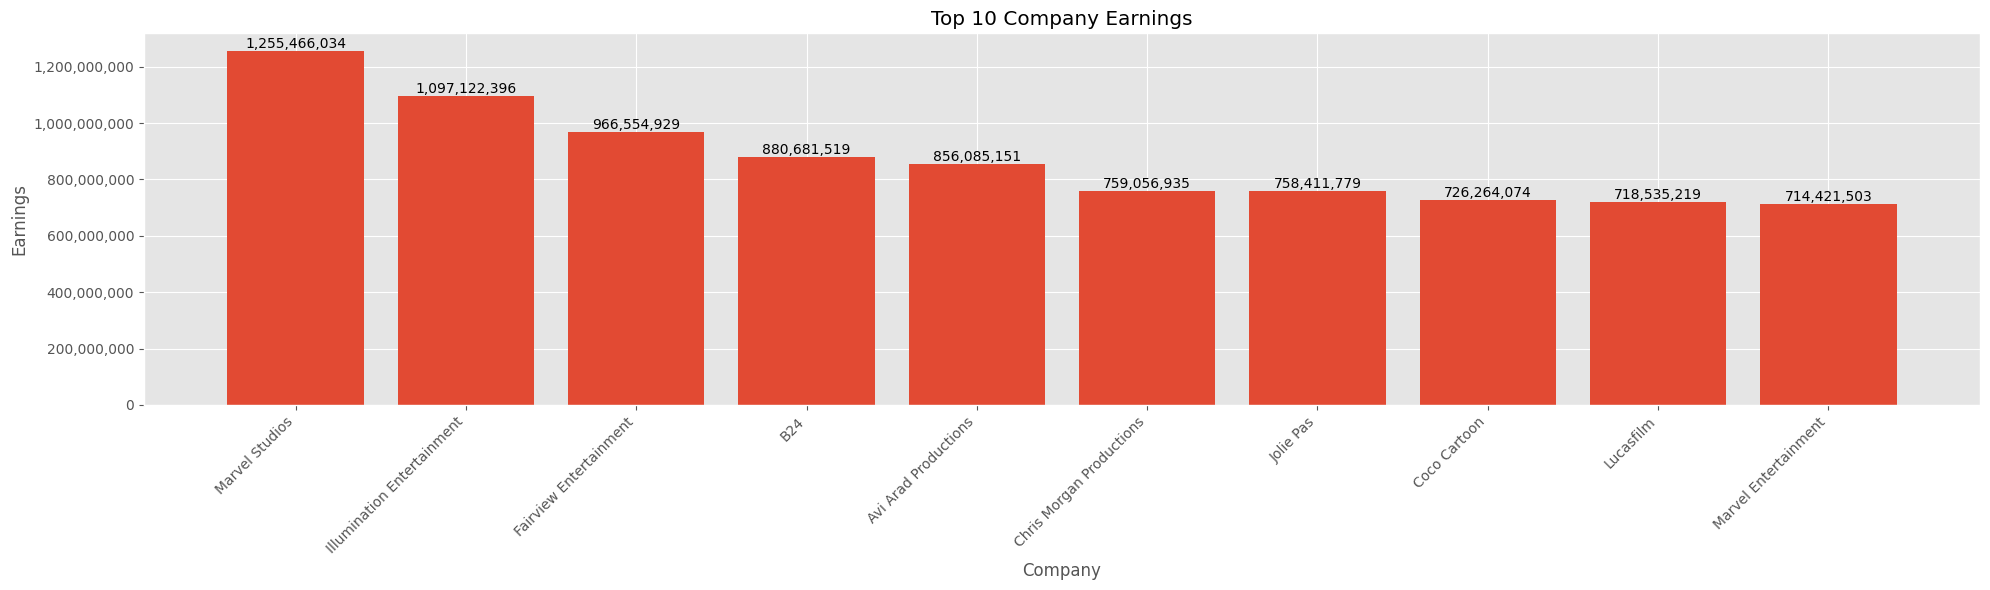

In [608]:
# group by company with mean gross to figuer out the avergae earning per company  
gross_via_comapny = df_cleaned.groupby("company")["gross"].mean().sort_values(ascending=False)
gross_via_comapny = gross_via_comapny.head(10)
pd.DataFrame(gross_via_comapny)

# Data
x = gross_via_comapny.index
y = gross_via_comapny.values

# Create figure and set size
plt.figure(figsize=(20, 6))

# Create the vertical bar plot
bars = plt.bar(x, y)

# Add labels and title
plt.xlabel('Company')
plt.ylabel('Earnings')
plt.title('Top 10 Company Earnings')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')  # Rotate labels 45 degrees, align right

# Format the y-axis with commas
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Add value labels on each bar with comma separators
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{int(yval):,}', ha='center', va='bottom')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

**7- Top director**

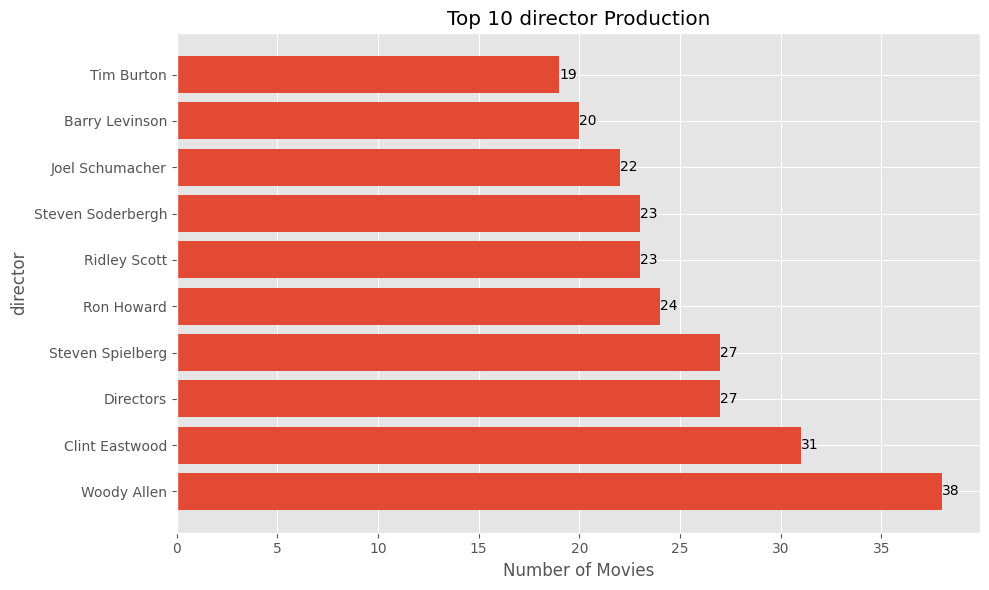

In [609]:
#create analysis for director, group by director with total movies
director = df_cleaned["director"].value_counts().sort_values(ascending=False).head(10)
director.head()

# Data
y = director.index
x = director.values

# Create figure and set size
plt.figure(figsize=(10, 6))

# Create the horizontal bar plot
bars = plt.barh(y, x)

# Add labels and title
plt.xlabel('Number of Movies')
plt.ylabel('director')
plt.title('Top 10 director Production')

# Add value labels on each bar
plt.bar_label(bars)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

**8- Top Directors and Their Average Movie gross Revenue**

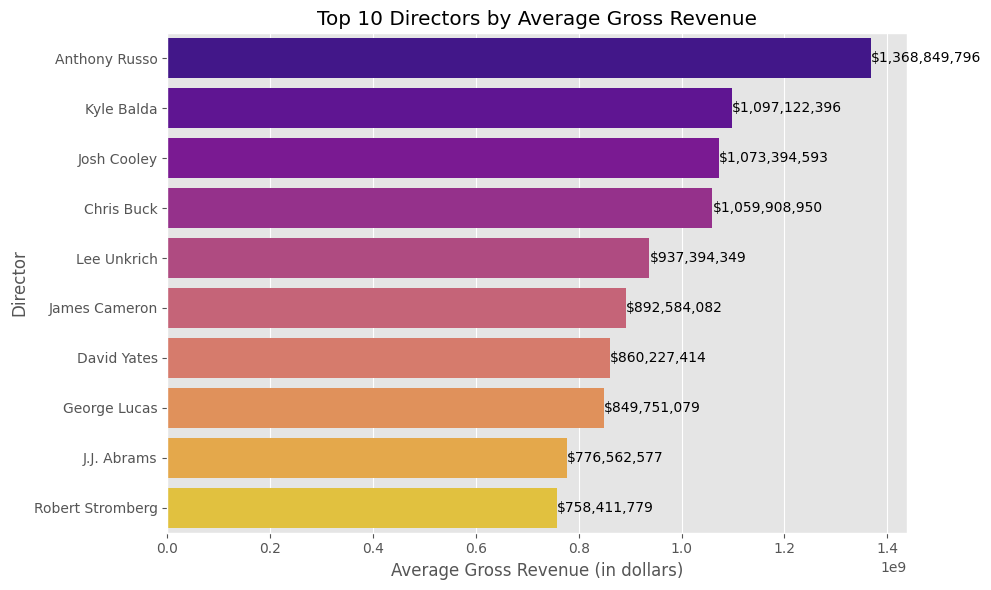

In [610]:
# Top Directors and Their Average Movie Gross Revenue
top_directors = df_cleaned.groupby('director')['gross'].mean().sort_values(ascending=False).head(10)

# Create figure
plt.figure(figsize=(10, 6))

# Create bar plot
sns.barplot(x=top_directors.values, y=top_directors.index, palette='plasma')

# Add value labels to each bar
for i, value in enumerate(top_directors.values):
    plt.text(value, i, f'${int(value):,}', va='center')  # Add labels with dollar formatting

# Add title and labels
plt.title('Top 10 Directors by Average Gross Revenue')
plt.xlabel('Average Gross Revenue (in dollars)')
plt.ylabel('Director')

# Show plot
plt.tight_layout()
plt.show()

**9- Genre and Their Average Movie Gross Revenue**

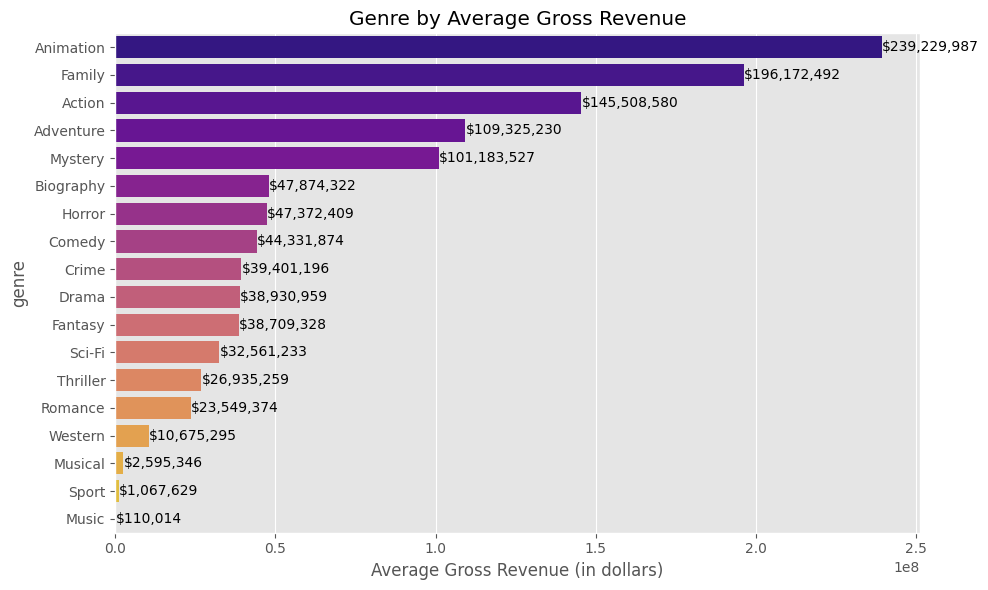

In [611]:
# Genre and Their Average Movie Gross Revenue
top_genre = df_cleaned.groupby('genre')['gross'].mean().sort_values(ascending=False)

# Create figure
plt.figure(figsize=(10, 6))

# Create bar plot
sns.barplot(x=top_genre.values, y=top_genre.index, palette='plasma')

# Add value labels to each bar
for i, value in enumerate(top_genre.values):
    plt.text(value, i, f'${int(value):,}', va='center')  # Add labels with dollar formatting

# Add title and labels
plt.title('Genre by Average Gross Revenue')
plt.xlabel('Average Gross Revenue (in dollars)')
plt.ylabel('genre')

# Show plot
plt.tight_layout()
plt.show()

**10- Runtime vs IMDb Score**

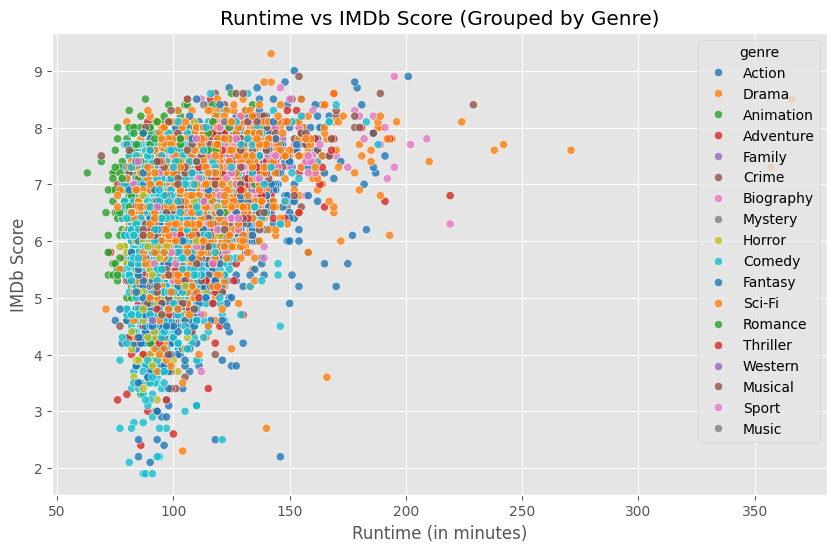

In [612]:
#Runtime vs IMDb Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='runtime', y='score', data=df_cleaned, hue='genre', palette='tab10', alpha=0.8)
plt.title('Runtime vs IMDb Score (Grouped by Genre)')
plt.xlabel('Runtime (in minutes)')
plt.ylabel('IMDb Score')
plt.show()

# Correlation analysis

In [613]:
# find out the correlation
df_cleaned.corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.091821,0.215740,0.288977,0.257486,0.114672
score,0.091821,1.000000,0.413096,0.058253,0.186258,0.397314
votes,0.215740,0.413096,1.000000,0.457389,0.630757,0.309541
budget,0.288977,0.058253,0.457389,1.000000,0.744926,0.272884
gross,0.257486,0.186258,0.630757,0.744926,1.000000,0.245221
runtime,0.114672,0.397314,0.309541,0.272884,0.245221,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

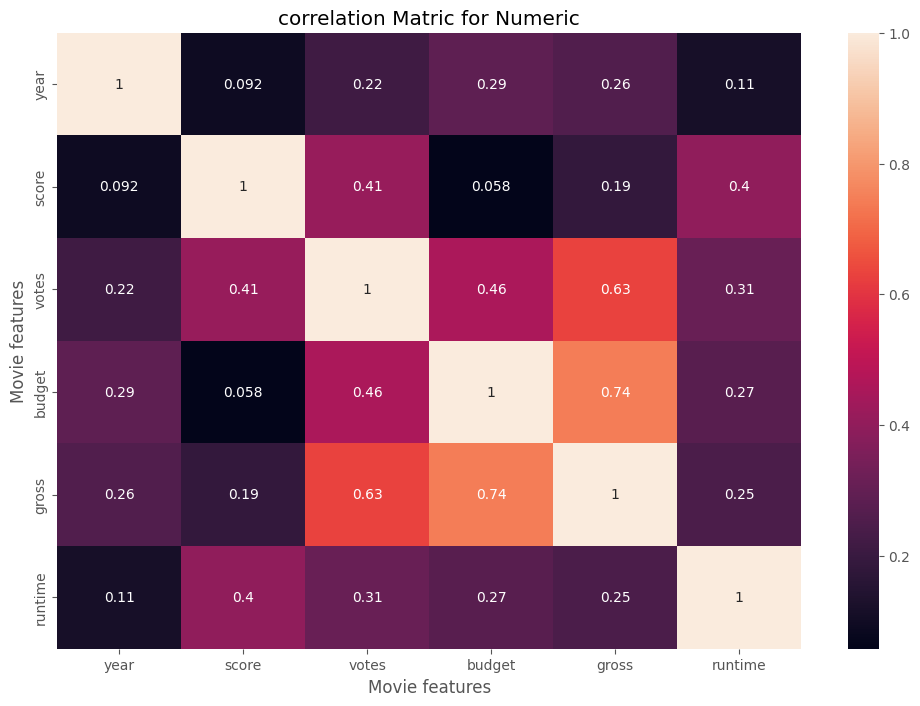

In [614]:
# visualize the correlation with a heat map 
correlation_matrix = df_cleaned.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)
plt.title('correlation Matric for Numeric')
plt.xlabel('Movie features')
plt.ylabel('Movie features')
plt.show

## turn all the non-numeric fields into numeric ones to be able to find the correlation for the rest of the data

In [615]:
# turn all the non-numeric fields into numeric ones to be able to find the correlation for the rest of the data

df_numerized = df_cleaned
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype("category")
        df_numerized[col_name] = df_numerized[col_name].cat.codes

In [616]:
# check the data

df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year
5445,519,5,0,2009,683,7.8,1100000,1116,1719,2233,53,237000000,2847246203,2148,162,29
7445,521,5,0,2019,179,8.4,903000,161,717,2141,53,356000000,2797501328,1532,181,39
3045,6727,5,6,1997,691,7.8,1100000,1116,1719,1524,53,200000000,2201647264,2148,194,17
6663,5008,5,0,2015,685,7.8,876000,1086,2468,504,53,245000000,2069521700,1470,138,35
7244,522,5,0,2018,188,8.4,897000,161,717,2141,53,321000000,2048359754,1532,149,38


In [617]:
# find out the correlation after numerized rest of data fields
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year
name,1.000000,-0.011779,0.017885,0.007404,-0.011033,0.015473,0.011429,0.009092,0.008964,0.007278,-0.012640,0.020096,0.005557,0.007556,0.009138,0.006891
rating,-0.011779,1.000000,0.120856,0.027984,0.023047,0.020423,0.013574,0.012939,-0.001283,0.002181,0.024890,-0.150301,-0.132578,-0.085508,0.070763,0.028682
genre,0.017885,0.120856,1.000000,-0.082252,0.026804,0.046093,-0.149289,-0.016412,0.008465,-0.002322,-0.032234,-0.337453,-0.243059,-0.073803,-0.040984,-0.077869
year,0.007404,0.027984,-0.082252,1.000000,0.002465,0.091821,0.215740,-0.019116,-0.008030,-0.032319,-0.083698,0.288977,0.257486,-0.017709,0.114672,0.997499
released,-0.011033,0.023047,0.026804,0.002465,1.000000,0.044301,0.018043,-0.002315,-0.003679,0.015812,-0.020084,0.014178,0.002341,-0.006048,0.000615,-0.001913
score,0.015473,0.020423,0.046093,0.091821,0.044301,1.000000,0.413096,0.008810,0.019032,0.000310,-0.129840,0.058253,0.186258,-0.003843,0.397314,0.099560
votes,0.011429,0.013574,-0.149289,0.215740,0.018043,0.413096,1.000000,0.000919,0.000284,-0.021274,0.069712,0.457389,0.630757,0.128914,0.309541,0.211400
director,0.009092,0.012939,-0.016412,-0.019116,-0.002315,0.008810,0.000919,1.000000,0.298059,0.036794,0.014918,-0.002036,-0.014490,0.004654,0.016941,-0.018896
writer,0.008964,-0.001283,0.008465,-0.008030,-0.003679,0.019032,0.000284,0.298059,1.000000,0.024408,0.011290,-0.031209,-0.023550,0.003407,-0.003055,-0.008215
star,0.007278,0.002181,-0.002322,-0.032319,0.015812,0.000310,-0.021274,0.036794,0.024408,1.000000,-0.017083,-0.020100,-0.002602,0.004510,0.009226,-0.033085


<function matplotlib.pyplot.show(close=None, block=None)>

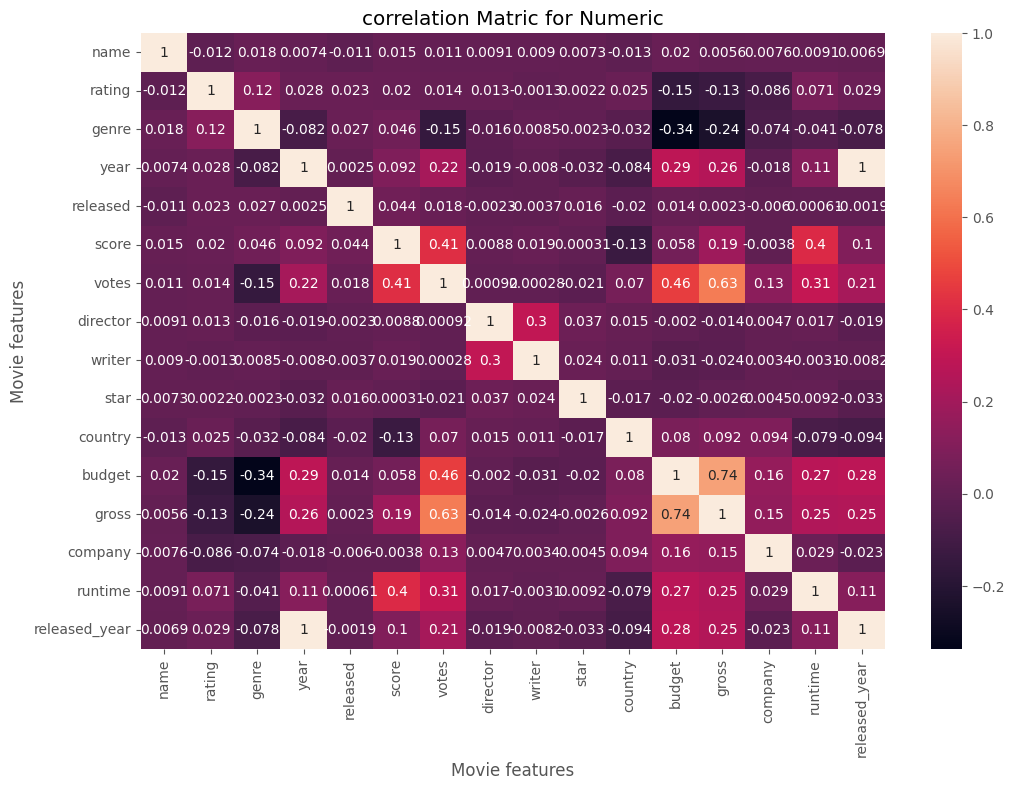

In [618]:
# visualize all the data fields' correlation with a heat map 
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)
plt.title('correlation Matric for Numeric')
plt.xlabel('Movie features')
plt.ylabel('Movie features')
plt.show

**Summarized the correlation analysis**

In [619]:
# Summarized the correlation analysis and sorting
corr_data = df_numerized.corr().unstack()
corr_final = corr_data.sort_values(kind="quicksort")

print(corr_final)

budget         genre           -0.337453
genre          budget          -0.337453
               gross           -0.243059
gross          genre           -0.243059
budget         rating          -0.150301
                                  ...   
year           year             1.000000
genre          genre            1.000000
rating         rating           1.000000
runtime        runtime          1.000000
released_year  released_year    1.000000
Length: 256, dtype: float64


In [620]:
# choose only the highest correlated fields, more than 0.5
strong_corr = corr_final[abs(corr_final) > 0.5]

print(strong_corr)

votes          gross            0.630757
gross          votes            0.630757
budget         gross            0.744926
gross          budget           0.744926
year           released_year    0.997499
released_year  year             0.997499
name           name             1.000000
company        company          1.000000
gross          gross            1.000000
budget         budget           1.000000
country        country          1.000000
star           star             1.000000
writer         writer           1.000000
director       director         1.000000
votes          votes            1.000000
score          score            1.000000
released       released         1.000000
year           year             1.000000
genre          genre            1.000000
rating         rating           1.000000
runtime        runtime          1.000000
released_year  released_year    1.000000
dtype: float64


**We can observe a very good correlation between:
1- Budget the strongest predictor of gross, with a correlation of 0.74.
2- Votes also shows a strong positive correlation with gross, at 0.61.
3- Other categorical features, after encoding, show much weaker correlations with gross.**

**the relation between Gross and budget**

<function matplotlib.pyplot.show(close=None, block=None)>

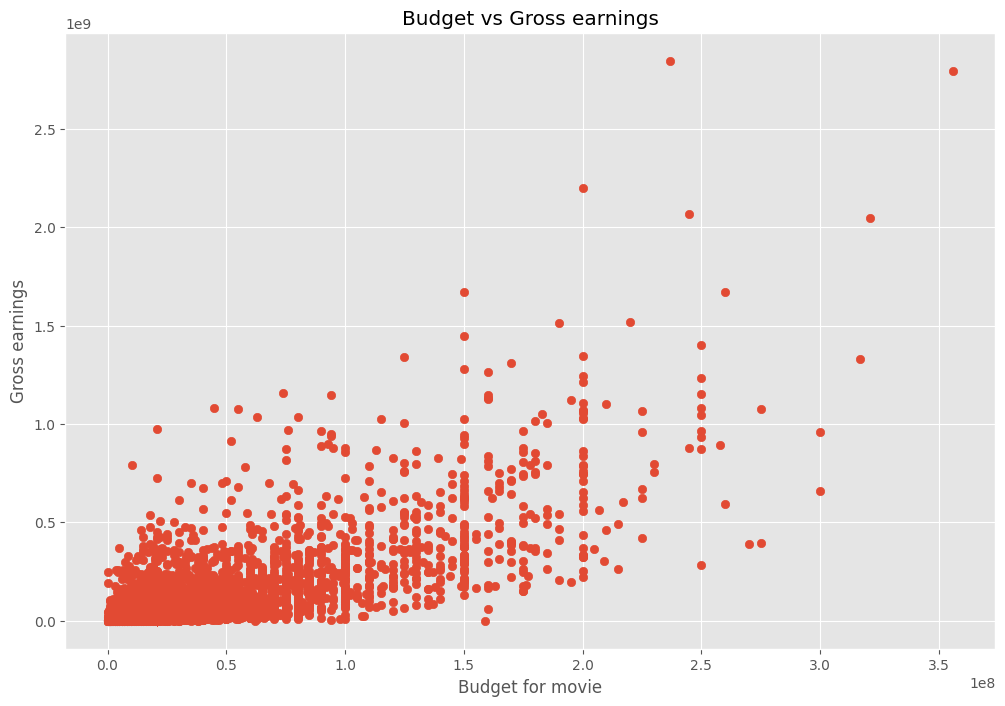

In [621]:
# create a visualization to show the relation between gross and budget
plt.scatter(x=df_cleaned['budget'], y=df_cleaned['gross'])
plt.title('Budget vs Gross earnings')
plt.xlabel('Budget for movie')
plt.ylabel('Gross earnings')
plt.show

<Axes: xlabel='budget', ylabel='gross'>

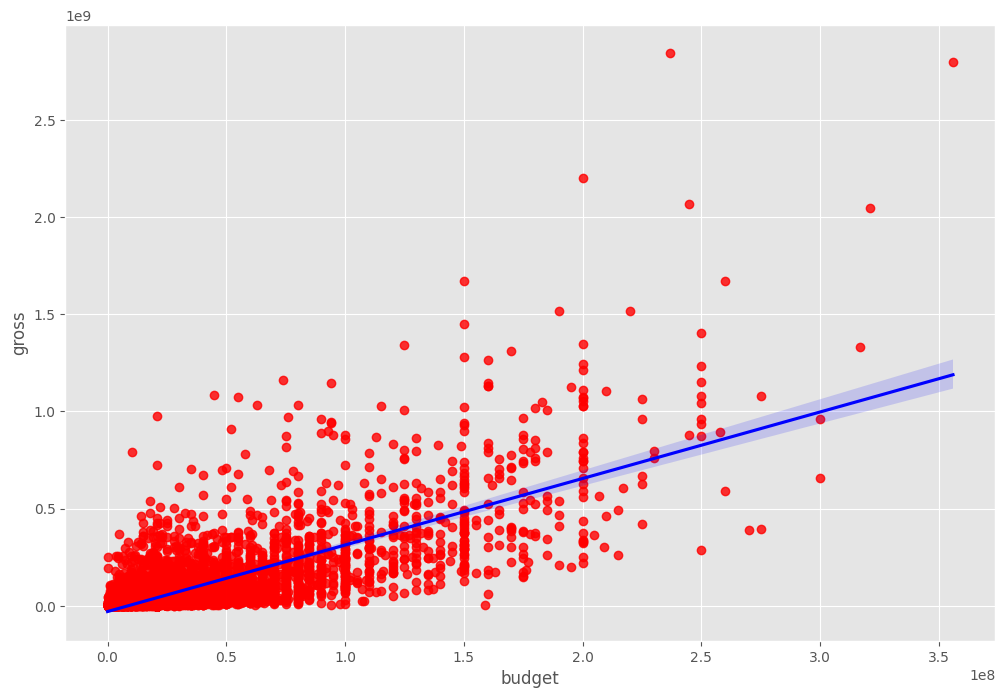

In [622]:
df_cleaned['budget'] = pd.to_numeric(df_cleaned['budget'], errors='coerce')
df_cleaned['gross'] = pd.to_numeric(df_cleaned['gross'], errors='coerce')
df_cleaned = df_cleaned.dropna(subset=['budget', 'gross'])

# plot budget vs gross by seaborn
sns.regplot(x='budget', y='gross', data=df_cleaned, scatter_kws={"color": "Red"}, line_kws={"color":"blue"})

**the relation between Gross and votes**

<function matplotlib.pyplot.show(close=None, block=None)>

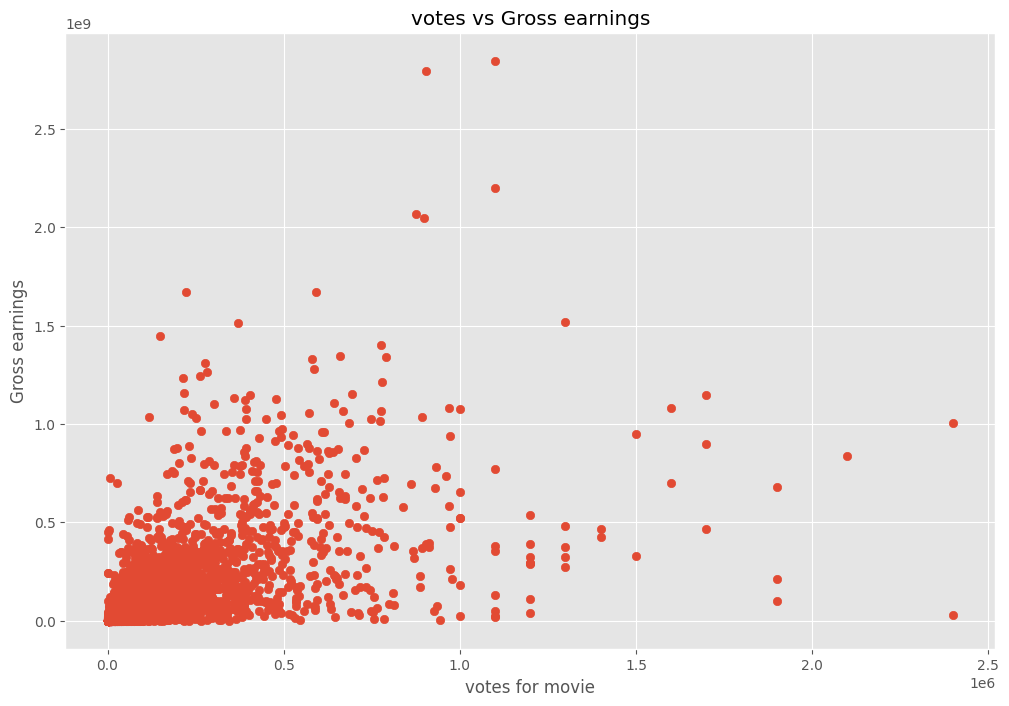

In [623]:
# create a visualization to show the relation between gross and votes
plt.scatter(x=df_cleaned['votes'], y=df_cleaned['gross'])
plt.title('votes vs Gross earnings')
plt.xlabel('votes for movie')
plt.ylabel('Gross earnings')
plt.show

<Axes: xlabel='votes', ylabel='gross'>

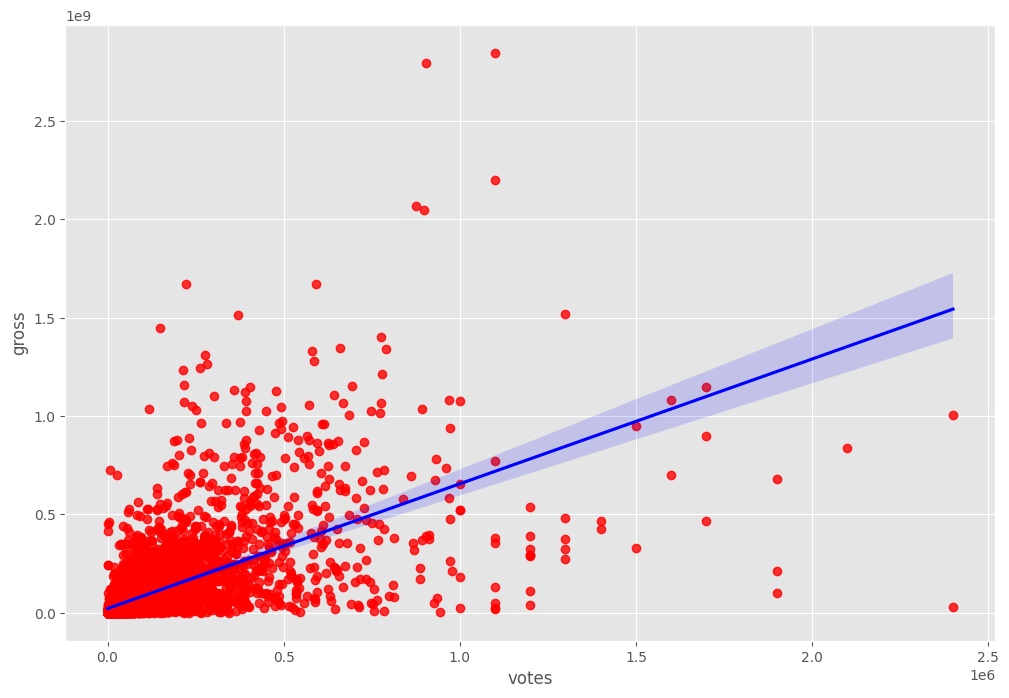

In [624]:
df_cleaned['votes'] = pd.to_numeric(df_cleaned['votes'], errors='coerce')
df_cleaned['gross'] = pd.to_numeric(df_cleaned['gross'], errors='coerce')
df_cleaned = df_cleaned.dropna(subset=['votes', 'gross'])

# plot budget vs gross by seaborn
sns.regplot(x='votes', y='gross', data=df_cleaned, scatter_kws={"color": "Red"}, line_kws={"color":"blue"})